## Instructions:
* Make a copy of this notebook and save it in your Google Drive. Use the "Save a copy in Drive" button in the File menu on the top left corner.
* Do not import any other additional libraries in question 1 and 2.
* Avoid using ChatGPT for direct assistance. Your independent implementation skills are being assessed.
* You may use the internet at your disposal to solve the questions in this assignment.
* Enter your code only where a **\[CODE BLOCK\]** is given.

## Question 1 (15 marks)

Gradient descent (GD) is an iterative first-order optimisation algorithm commonly used in machine learning (ML) and deep learning (DL) to minimise a cost/loss function (e.g. in a linear regression).

The fundamental concept is that we move in the direction opposite to the gradient of the cost function concerning a specific hyperparameter, either w or b.

Below is the code implemented for the Linear Regression algorithm.

* We generate regression data using the scikit_learn inbuilt library.
* We generate random weight matrices using the np.random.randn function.
* Apply the GD Algorithm :-
 * Calculate the output of the model.
 * Calculate the error. (Using the MSE Cost function)
 * Compute the gradient of the cost function wrt our hyperparameter.
 * Update theta.

Have a look at the code below and fill in the necessary blanks "...". Do not change any other part of the driver code.

Note:- Use the Mean Squared error as your cost function given as:

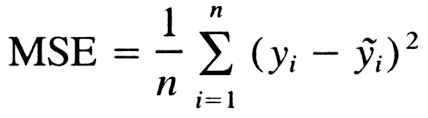

ybar is the predicted output.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# sklearn.datasets.make_regression is a function in scikit-learn that generates
# a random regression dataset with specified parameters, such as the number of
# samples, number of features, and level of noise.

X, y = make_regression(n_samples=100, n_features=1, noise=10)

In [4]:
def gradient_descent(X, y, learning_rate, num_iterations):
    # Initialize parameters
    theta = np.random.randn()
    intercept = np.random.randn()
    m = len(y)
    cost_history = []
    y=y.reshape(-1,1)

    for i in range(num_iterations):
        # Compute predictions and error
        prediction = (X * theta) + intercept
        error = np.subtract(prediction, y)


        # Compute gradients
        gradient_theta = (1/m) * np.dot(error.T, X)
        gradient_intercept = (1/m) * np.sum(error)

        # Update parameters
        theta -= learning_rate * gradient_theta
        intercept -= learning_rate * gradient_intercept

        # Compute and store cost
        cost = (1/(2*m)) * np.sum(error ** 2)
        cost_history.append(cost)

    return theta, intercept, cost_history

In [5]:
# Set the learning rate and number of iterations
learning_rate = 0.001
num_iterations = 10000

# Call the gradient_descent function and store the results
theta, intercept, cost_history = gradient_descent(X, y, learning_rate, num_iterations)

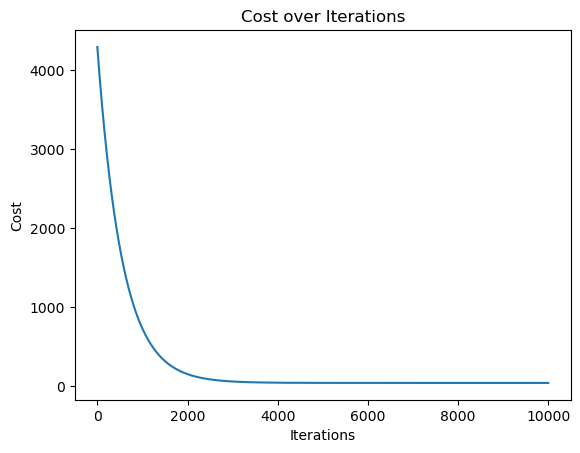

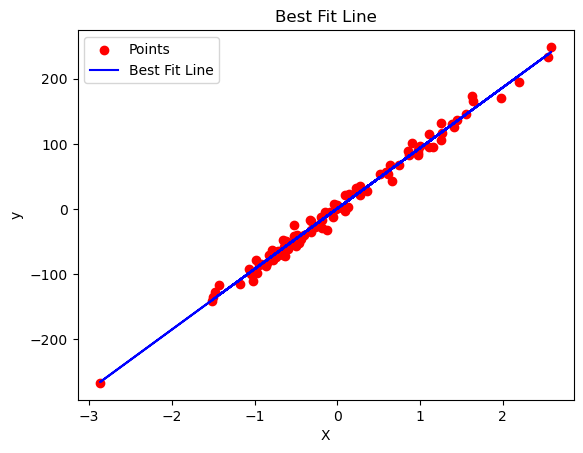

In [7]:
# Plot the cost function over iterations

plt.plot(cost_history)
plt.title('Cost over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Plot the best fit line

plt.scatter(X, y, color='red', label='Points')
plt.plot(X, X * theta + 
         intercept, color='blue', label='Best Fit Line')
plt.title('Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


## Question 2 (25 marks)

The Logistic Regression algorithm shares similarities with Linear Regression, except for the incorporation of a sigmoid activation function. Additionally, instead of the Mean Squared Error (MSE) cost function, Logistic Regression employs the Binary Cross-Entropy cost function (can refer to the internet).


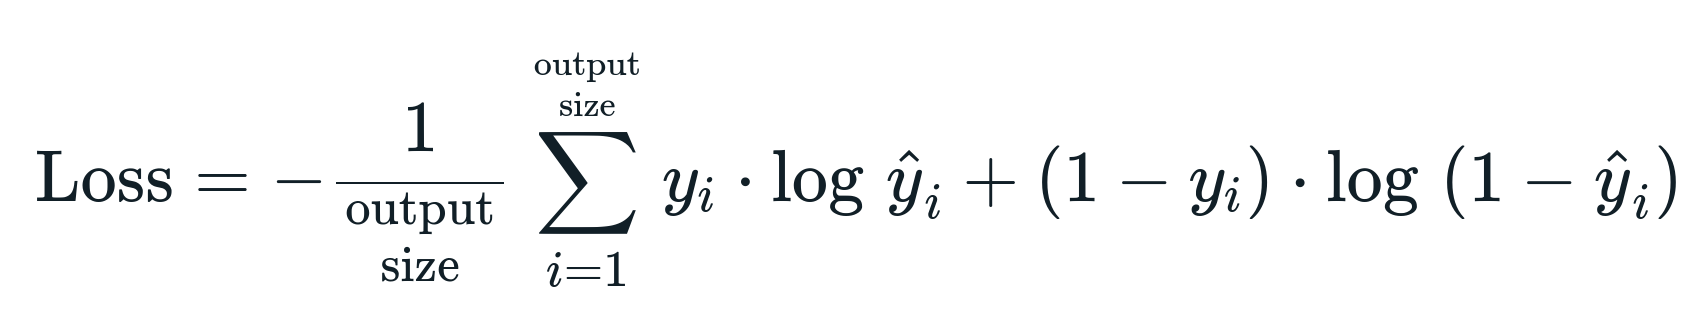

In [8]:
from sklearn.datasets import make_classification

In [9]:
# Generate random classification data using scikit-learn
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def sigmoid(z):
    sig= 1 / (1 + np.exp(-z))
    return sig

def logistic_regression(X, y, learning_rate, num_iterations):
    # Initializing parameters
    w1 = np.random.randn()
    w2 = np.random.randn()
    intercept = np.random.randn()
    m = len(y)
    cost_history = []


    for i in range(num_iterations):
        # Compute linear combination and sigmoid prediction
        z = w1 * X[:, 0] + w2 * X[:, 1] + intercept
        y_predicted = sigmoid(z)


        # Compute error
        error = y_predicted - y


        # Compute gradients
        gradient_w1 = (1/m) * np.dot(error, X[:, 0])
        gradient_w2 = (1/m) * np.dot(error, X[:, 1])
        gradient_intercept = (1/m) * np.sum(error)


        # Update weights
        w1 -= learning_rate * gradient_w1
        w2 -= learning_rate * gradient_w2
        intercept -= learning_rate * gradient_intercept


        # Compute Binary Cross Entropy loss (cost)
        cost = -(1/m) * np.sum(y * np.log(y_predicted + 1e-15) + (1 - y) * np.log(1 - y_predicted + 1e-15))
        cost_history.append(cost)

    return w1, w2, cost_history




In [15]:
# Set the learning rate and number of iterations
learning_rate = 0.0025
num_iterations = 10000

# Call the logistic_regression function and store the results
w1,w2, cost_history = logistic_regression(X, y, learning_rate, num_iterations)


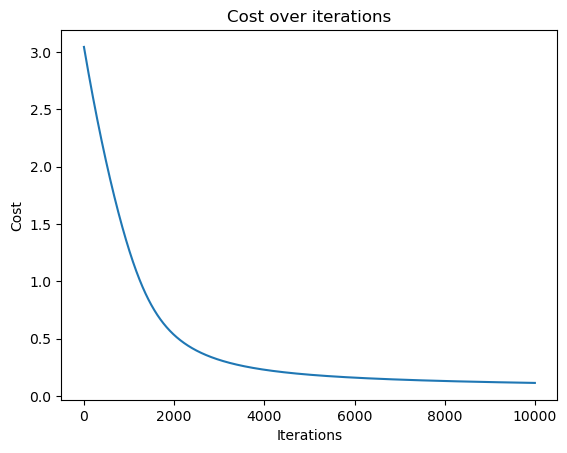

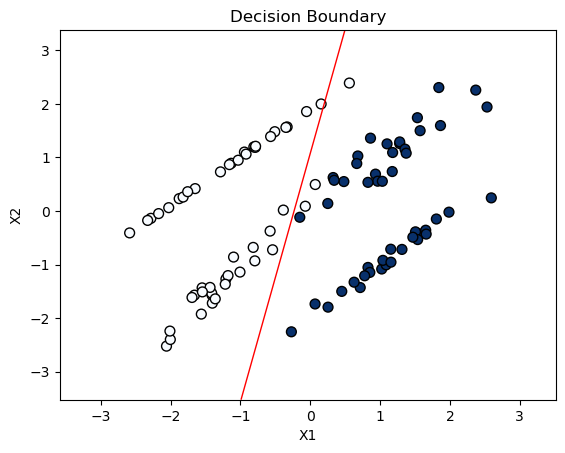

In [17]:

# Plot the cost function over iterations
plt.plot(np.arange(num_iterations), cost_history)
plt.title('Cost over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# BONUS POINTS IF YOU ARE ABLE TO PLOT THE DECISION BOUNDARY.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Blues', edgecolors='k', s=50)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

z = sigmoid(w1 * xx + w2 * yy + intercept)
plt.contour(xx, yy, z, levels=[0.5], linewidths=1, colors='red')
plt.title('Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()



## Question 3 (10 marks)

Your task is to create a Pandas pipeline that preprocesses a DataFrame by performing the following transformations: imputing missing values using mean, scaling numeric features to zero mean and unit variance. You are expected to implement a class named DataPreprocessor that encapsulates the functionality of this preprocessing pipeline. Your implementation should include the following attributes and functions:

Attributes:  
* None

Functions:  
* preprocess_data(self, df):  
Applies preprocessing transformations to the DataFrame df and returns the processed DataFrame.  
 * Parameters:  
    * df: The input DataFrame to be preprocessed.  
  * Returns:  
    * processed_df: The preprocessed DataFrame with imputed missing values, scaled numeric features, and one-hot encoded categorical variables.  

In [21]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

class DataPreprocessor:
    def __init__(self):
        self.pipeline = None
        self._create_pipeline()

    def _create_pipeline(self):
        self.numerical_features = ['age', 'salary']
        self.categorical_features = ['gender', 'education']

        # Numeric pipeline: Imputing missing with mean and scale
        numerical_pipeline = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ])

        # Categorical pipeline: One-hot encoding
        categorical_pipeline = Pipeline(steps=[
            ('encoder', OneHotEncoder(drop='first'))  # drop first to avoid dummy variable trap
        ])

        # Combine both pipelines
        self.pipeline = ColumnTransformer(transformers=[
            ('num', numerical_pipeline, self.numerical_features),
            ('cat', categorical_pipeline, self.categorical_features)
        ])

    def preprocess_data(self, df):
        # Fit and transform the data
        transformed_array = self.pipeline.fit_transform(df)

        # Get column names after transformation
        cat_encoded_cols = self.pipeline.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(self.categorical_features)
        all_columns = self.numerical_features + list(cat_encoded_cols)

        # Return as DataFrame
        return pd.DataFrame(transformed_array, columns=all_columns)


Now convert the **data** dictionary into a dataframe and apply the preprocessing pipeline to this dataframe

In [22]:
data = {'age': [25, 30, None, 35, 56, 78, 23, None],
        'salary': [50000, None, 60000, 70000, 28902, 43009, None, 10000],
        'gender': ['M', 'F', 'M', 'F', 'M', 'F', 'F', 'F'],
        'education': ['Bachelor', 'Master', 'PhD', 'Bachelor', 'Bachelor', 'Bachelor', 'PhD', 'Master']}
df = pd.DataFrame(data)

# Initializing DataPreprocessor object
preprocessor = DataPreprocessor()

# Applying preprocessing pipeline to the DataFrame
processed_df = preprocessor.preprocess_data(df)
print(processed_df)


        age    salary  gender_M  education_Master  education_PhD
0 -0.947131  0.370217       1.0               0.0            0.0
1 -0.654204  0.000000       0.0               1.0            0.0
2  0.000000  0.953403       1.0               0.0            1.0
3 -0.361277  1.536590       0.0               0.0            0.0
4  0.869017 -0.860190       1.0               0.0            0.0
5  2.157895 -0.037489       0.0               0.0            0.0
6 -1.064301  0.000000       0.0               0.0            1.0
7  0.000000 -1.962530       0.0               1.0            0.0


## Question 4  (_10 Brownie points for this question_)

Your team is tasked with building a Machine Learning pipeline for a reputed MNC. Your Manager assigns you the task of making an interactive plot to display the data obtained for various sources in a niche manner.


Here, implement an interactive matplotlib plot where clicking on a point displays the corresponding coordinates and category label from a pandas DataFrame.

You are expected to furnish the following deliverables post attempting this question:

> 1) A custom function which named "on_plot_click" with "sel" as a keyword parameter. This function serves as a callback function which is called whenever the user clicks at a datapoint on the plot.

> 2) An interactive **scatter** plot which displays the coordinates and category labels of that point.


Make sure you first create a DataFrame with 2 columns of numerical and categorical data each. You may use the dataFrame created in question 3 for this purpose.

_Hint_ : \
1) Explore the documentation of a python library called mplcursors [here](https://mplcursors.readthedocs.io/en/stable/).

2) 'None' values in data make many people cut a sorry figure. So you better impute them.

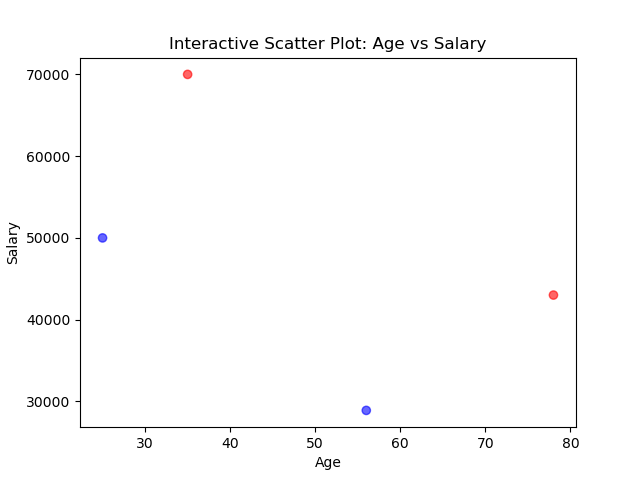

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import mplcursors

%matplotlib widget

# Creating scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(df['age'], df['salary'], 
                c=df['gender'].map({'M': 'blue', 'F': 'red'}), 
                alpha=0.6)

ax.set_xlabel("Age")
ax.set_ylabel("Salary")
ax.set_title("Interactive Scatter Plot: Age vs Salary")

# Callback function
def on_plot_click(sel):
    index = sel.index
    age = df.loc[index, 'age']
    salary = df.loc[index, 'salary']
    gender = df.loc[index, 'gender']
    education = df.loc[index, 'education']
    sel.annotation.set_text(f'Age: {age}\nSalary: {salary}\nGender: {gender}\nEducation: {education}')

# Connecting cursor
cursor = mplcursors.cursor(sc, hover=True)
cursor.connect("add", on_plot_click)

# Show the plot
plt.show()

